# Visualización de Word Embeddings
<hr />

1. Utilizarás vectores pre-entrenados que se pueden descargar libremente de la web, evaluarás 3 modelos de vectores de palabras en Inglés:
- Word2vec: https://code.google.com/archive/p/word2vec
- Fasttext: https://fasttext.cc
- GloVe: https://nlp.stanford.edu/projects/glove

2. Utilizarás la librería Gensim de Python. Gensim es un software robusto, eficiente y sin complicaciones para realizar modelos semánticos sin supervisión a partir de texto sin formato. Implementa la familia de algoritmos word2vec, utilizando rutinas C altamente optimizadas, transmisión de datos e interfaces "Pythonicas": https://radimrehurek.com/gensim/models/word2vec.html

3. Utilizarás las listas de palabras que se adjuntan en la tarea y que pertenecen a 3 categorías: comida, deporte y tiempo. Las listas de palabras fueron obtenidas de: https://www.enchantedlearning.com/wordlist

4. Por cada palabra de las listas de palabras deberás obtener su representación vectorial y representarla en 2 dimensiones para visualizar en un plano cartesiano. Cada palabra debe estar coloreada igual que las demás palabras de su categoría.

5. Para visualizar las palabras en 2 dimensiones, puedes usar TSNE implementado en sklearn: http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [1]:
# Instalar gensim
!pip install --upgrade gensim

In [11]:
import gensim.downloader as api
import pandas as pd
import requests
import numpy as np

In [12]:
# Para visualizar las palabras en 2 dimensiones, puedes usar TSNE implementado en sklearn
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [28]:
def read_txt(url):
  response = requests.get(url)

  if response.status_code == 200:
    return response.text.splitlines()
  else:
    raise Exception(f"Error {response.status_code}: No se pudo leer el archivo")

# Lista de Palabras


In [29]:
# Obtener listado de palabras | categoría: comida, deporte, tiempo
comida = read_txt("https://raw.githubusercontent.com/NelbaBarreto/programacion-ciencias-datos/refs/heads/main/data/food_words.txt")
deporte = read_txt("https://raw.githubusercontent.com/NelbaBarreto/programacion-ciencias-datos/refs/heads/main/data/sports_words.txt")
tiempo = read_txt("https://raw.githubusercontent.com/NelbaBarreto/programacion-ciencias-datos/refs/heads/main/data/weather_words.txt")

# Obtener la Representación Vectorial de las Palabras

In [58]:
# Por cada palabra de las listas de palabras obtener su representación vectorial y representarla en 2 dimensiones para visualizar en un plano cartesiano
def getWordVecs(words, model):
    vecs = []
    for word in words:
        word = word.replace("\n", "")
        try:
            vecs.append(model[word].reshape((1,300)))
        except KeyError:
            continue
    vecs = np.concatenate(vecs)
    return np.array(vecs, dtype="float") # TSNE espera tipos de valor flotante

# Word2vec

In [3]:
# Instanciar el modelo
model_w2v = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [35]:
# Obtener la representación vectorial de las palabras
food_vecs = getWordVecs(comida, model_w2v)
sports_vecs = getWordVecs(deporte, model_w2v)
weather_vecs = getWordVecs(tiempo, model_w2v)

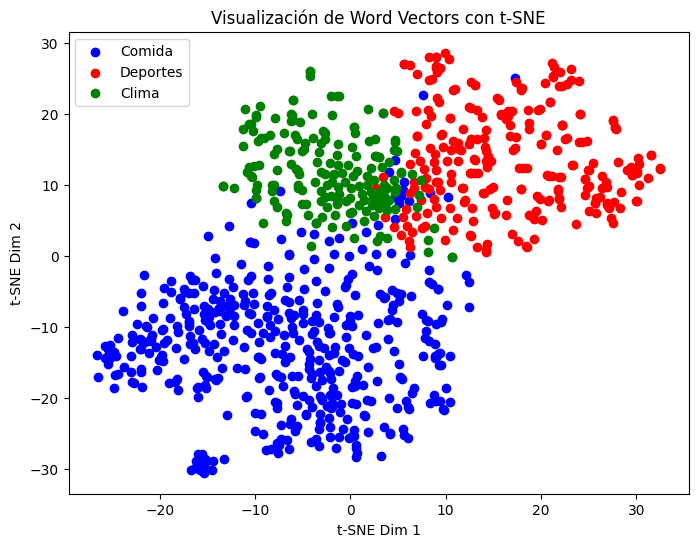

In [41]:
# Concatenar todos los vectores en un solo array
all_vecs = np.vstack([food_vecs, sports_vecs, weather_vecs])

# Aplicamos t-SNE sobre el conjunto completo
ts = TSNE(n_components=2, perplexity=30, random_state=42)
reduced_vecs = ts.fit_transform(all_vecs)

# Definir los índices para cada grupo
n_food = len(food_vecs)
n_sports = len(sports_vecs)
n_weather = len(weather_vecs)

# Asignar colores a cada grupo
plt.figure(figsize=(8, 6))
plt.scatter(reduced_vecs[:n_food, 0], reduced_vecs[:n_food, 1], color="b", marker="o", label="Comida")
plt.scatter(reduced_vecs[n_food:n_food+n_sports, 0], reduced_vecs[n_food:n_food+n_sports, 1], color="r", marker="o", label="Deportes")
plt.scatter(reduced_vecs[n_food+n_sports:, 0], reduced_vecs[n_food+n_sports:, 1], color="g", marker="o", label="Clima")

# Agregar etiquetas y título
plt.title("Visualización de Word Vectors con t-SNE")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.legend()
plt.show()

Se puede observar que las palabras están agrupadas de acuerdo a su categoría con el modelo word2vec.

# Fasttext

In [57]:
# Instanciar el modelo
model_ftxt = api.load("fasttext-wiki-news-subwords-300")

[==================================================] 100.0% 958.5/958.4MB downloaded


In [59]:
# Obtener la representación vectorial de las palabras
food_vecs = getWordVecs(comida, model_ftxt)
sports_vecs = getWordVecs(deporte, model_ftxt)
weather_vecs = getWordVecs(tiempo, model_ftxt)

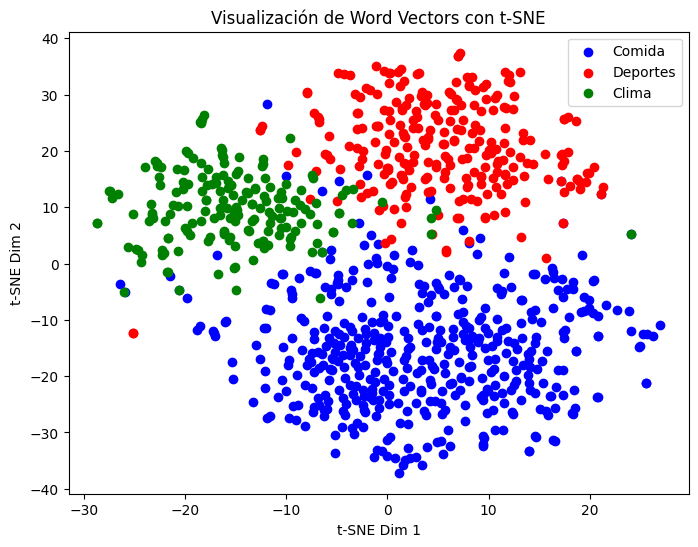

In [60]:
# Concatenar todos los vectores en un solo array
all_vecs = np.vstack([food_vecs, sports_vecs, weather_vecs])

# Aplicamos t-SNE sobre el conjunto completo
ts = TSNE(n_components=2, perplexity=30, random_state=42)
reduced_vecs = ts.fit_transform(all_vecs)

# Definir los índices para cada grupo
n_food = len(food_vecs)
n_sports = len(sports_vecs)
n_weather = len(weather_vecs)

# Asignar colores a cada grupo
plt.figure(figsize=(8, 6))
plt.scatter(reduced_vecs[:n_food, 0], reduced_vecs[:n_food, 1], color="b", marker="o", label="Comida")
plt.scatter(reduced_vecs[n_food:n_food+n_sports, 0], reduced_vecs[n_food:n_food+n_sports, 1], color="r", marker="o", label="Deportes")
plt.scatter(reduced_vecs[n_food+n_sports:, 0], reduced_vecs[n_food+n_sports:, 1], color="g", marker="o", label="Clima")

# Agregar etiquetas y título
plt.title("Visualización de Word Vectors con t-SNE")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.legend()
plt.show()

# GloVe

In [64]:
# Instanciar el modelo
model_glove = api.load("glove-wiki-gigaword-300")

[==================================================] 100.0% 376.1/376.1MB downloaded


In [65]:
# Obtener la representación vectorial de las palabras
food_vecs = getWordVecs(comida, model_glove)
sports_vecs = getWordVecs(deporte, model_glove)
weather_vecs = getWordVecs(tiempo, model_glove)

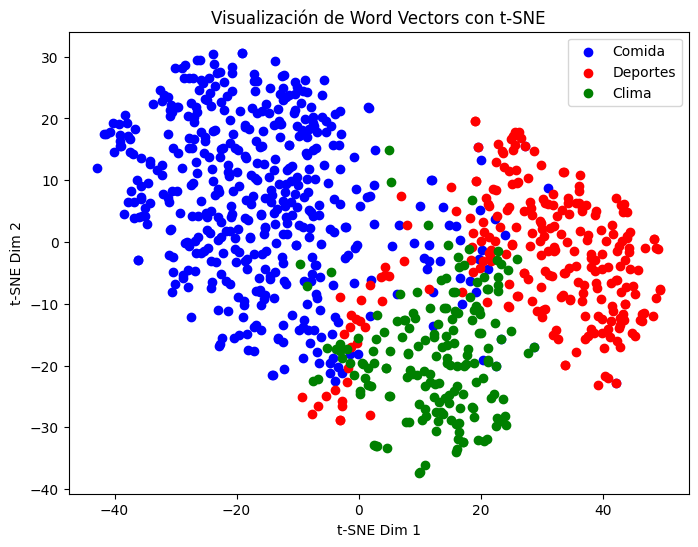

In [66]:
# Concatenar todos los vectores en un solo array
all_vecs = np.vstack([food_vecs, sports_vecs, weather_vecs])

# Aplicamos t-SNE sobre el conjunto completo
ts = TSNE(n_components=2, perplexity=30, random_state=42)
reduced_vecs = ts.fit_transform(all_vecs)

# Definir los índices para cada grupo
n_food = len(food_vecs)
n_sports = len(sports_vecs)
n_weather = len(weather_vecs)

# Asignar colores a cada grupo
plt.figure(figsize=(8, 6))
plt.scatter(reduced_vecs[:n_food, 0], reduced_vecs[:n_food, 1], color="b", marker="o", label="Comida")
plt.scatter(reduced_vecs[n_food:n_food+n_sports, 0], reduced_vecs[n_food:n_food+n_sports, 1], color="r", marker="o", label="Deportes")
plt.scatter(reduced_vecs[n_food+n_sports:, 0], reduced_vecs[n_food+n_sports:, 1], color="g", marker="o", label="Clima")

# Agregar etiquetas y título
plt.title("Visualización de Word Vectors con t-SNE")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.legend()
plt.show()

Este modelo parece no diferenciar del todo las palabras, hay más intersecciones.